In [50]:
from src.beach.model import Beach
from src.beach.agents import NUMBER_OF_CELLS
import matplotlib.pyplot as pl
import pandas as pd
import random

# Analysis of the of the Warehouse Multiagent System

So far we have run our agent model only once until it completes and we have looked the individual agent behaviour. Now, we will analyse the behaviour of the warehouse and the agents at as whole.


First we need to define the parameters of our model and simulation. Note we also define something call `seed` which is a parameter required to generate pseudo-random numbers. If you are not familiar with `seeds` please read [this short blog](https://yourbasic.org/algorithms/random-number-generator-seed/) about it.

In [51]:
n_steps = 2000
#seed = 123 
seed = random.randint(0,1000)

In [52]:
m = Beach(n_CT_robots=3, n_LC_robots=5, n_obstacles=50, n_Ldebris=20, n_debris=200, width=NUMBER_OF_CELLS, height=NUMBER_OF_CELLS, EXTENDED=True, NOVEL=True)

In [53]:
for i in range(n_steps):
    m.step()

LC 276 state is: 0
LC 276 position is:  1 , 60
Payload is 0
finding pheromones within range
Pheromone not found
Robot is now exploring
LC 278 state is: 0
LC 278 position is:  1 , 5
Payload is 0
finding pheromones within range
Pheromone not found
Robot is now exploring
LC 274 state is: 0
LC 274 position is:  1 , 46
Payload is 0
finding pheromones within range
Pheromone not found
Robot is now exploring
LC 277 state is: 0
LC 277 position is:  1 , 32
Payload is 0
finding pheromones within range
Pheromone not found
Robot is now exploring
Large Debris left 20
Debris left 198
Robot is now exploring
Large Debris left 20
Debris left 198
Robot is now exploring
LC 275 state is: 0
LC 275 position is:  1 , 47
Payload is 0
finding pheromones within range
Pheromone not found
Robot is now exploring
Bidder Step
Large Debris left 20
Debris left 198
Robot is now exploring
Large Debris left 20
Debris left 198
Exploring around cell 36 59
LC 276 state is: 1
LC 276 position is:  1 , 60
Payload is 0
finding p

In [54]:
m_df = m.datacollector.get_model_vars_dataframe()
ag_df = m.datacollector.get_agent_vars_dataframe()

## Cleanness of beach over time

All large debris finished at timestep 886
All small debris finished at timestep 566


Text(0.5, 1.0, 'Cleanliness of beach over time')

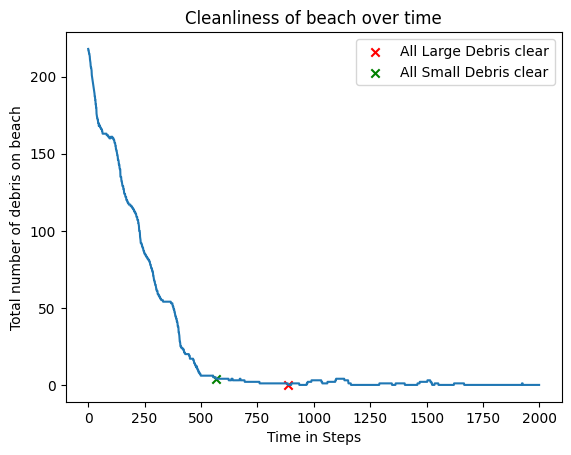

In [55]:
data = m_df.pending_LDebris + m_df.pending_Debris
pl.plot(data)

# Plot timestep where all Large debris are cleared
try:
    LDebris_Finish = m_df.index[m_df.pending_LDebris==0][0]
    print("All large debris finished at timestep", LDebris_Finish)
    pl.scatter(x = LDebris_Finish, y=data[LDebris_Finish], color='r', marker="x", label= "All Large Debris clear")
except:
    print("Large Debris not cleared")
    
# Plot timestep where all debris are cleared
try:
    Debris_Finish = m_df.index[m_df.pending_Debris==0][0]
    print("All small debris finished at timestep", Debris_Finish)
    pl.scatter(x = Debris_Finish, y=data[Debris_Finish], color='g', marker="x", label= "All Small Debris clear")
except:
    print("Small Debris not cleared")

pl.legend()
pl.xlabel("Time in Steps")
pl.ylabel("Total number of debris on beach")
pl.title("Cleanliness of beach over time")

## Agent Busyness over time
This metric shows us how efficient the agents are at searching the beach for work.

We want to minimise time exploring as that is time that could spent clearing the beach of debris.

This plot is also helpful in visualising the importance of the job creation system implemented in Activity 1 as we can compare time wasted exploring before and after implementation.

All large debris finished at timestep 886
All small debris finished at timestep 566


Text(0.5, 1.0, 'Time spent exploring over time')

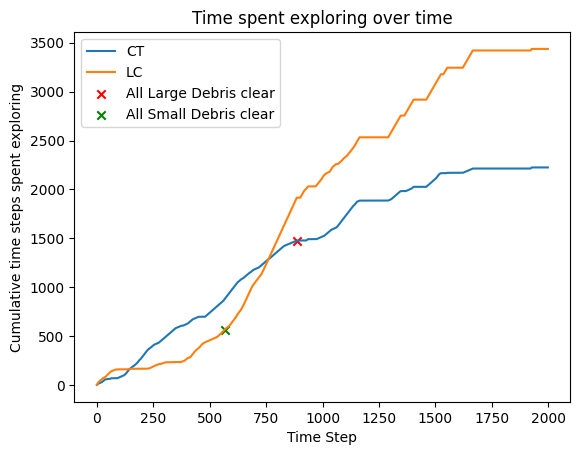

In [56]:
CT_exploring = m_df.exploring_CT.cumsum()
LC_exploring = m_df.exploring_LC.cumsum()

pl.plot(CT_exploring, label="CT")
pl.plot(LC_exploring, label="LC")

# Plot timestep where all Large debris are cleared
try:
    LDebris_Finish = m_df.index[m_df.pending_LDebris==0][0]
    print("All large debris finished at timestep", LDebris_Finish)
    pl.scatter(x = LDebris_Finish, y=CT_exploring[LDebris_Finish], color='r', marker="x", label= "All Large Debris clear")
except:
    print("Large Debris not cleared")

# Plot timestep where all debris are cleared
try:
    Debris_Finish = m_df.index[m_df.pending_Debris==0][0]
    print("All small debris finished at timestep", Debris_Finish)
    pl.scatter(x = Debris_Finish, y=LC_exploring[Debris_Finish], color='g', marker="x", label= "All Small Debris clear")
except:
    print("Small Debris not cleared")


pl.legend()
pl.xlabel("Time Step")
pl.ylabel("Cumulative time steps spent exploring")
pl.title("Time spent exploring over time")

## Energy Efficiency of CT agents
This plot shows how much average energy each CT agent spends on each pieces of debris collected.

This metric is important to measure as it gives investors an estimate on the costs of running the project.

LCs are not considered as they produce their own energy using solar panels.

[(251, 2292, 11), (252, 2434, 15), (253, 2328, 14)]
[208.36363636363637, 162.26666666666668, 166.28571428571428]


Text(0.5, 1.0, 'Efficiency of CT agents')

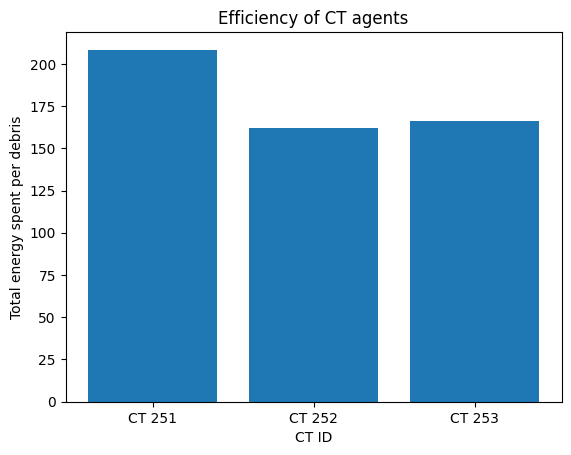

In [57]:
data = m_df["CT_efficiency"].iloc[-1]
print(data)

ids = [("CT " + str(x[0])) for x in data]
energy_efficiency = [x[1]/x[2] for x in data]
print(energy_efficiency)

pl.bar(x = ids, height = energy_efficiency)
pl.xlabel("CT ID")
pl.ylabel("Total energy spent per debris")
pl.title("Efficiency of CT agents")